### Riddler Express
From Christopher Kyba comes a bippity boppity puzzle:

Each morning, your fairy godmother appears and gives you a chance to play a game. In this game, she deals 10 cards face down. Nine of the cards are winners, and one card is a loser. If you pick a winning card, you get a prize. You can then either take your prize and walk away or play again for the chance to win a second prize. But if you lose on that second play, you walk away with nothing and the game is over for the day. Each time you succeed, she invites you to play again under the same conditions (win yet another prize or lose everything).

What strategy maximizes the average number of prizes you win each day? And what is that average?

Extra credit: Suppose your fairy godmother deals N cards each day (instead of 10 cards), with N−1 winning cards and one losing card. Now what is your strategy, and how many prizes do you expect to win each day?


#### Approach:

We can model this with a binomial distribution if we are solving with replacement. If we solve without replacement we can use the hypergeometric distribution. 


#### With Replacement: Binomial

Gives the probability `k` number of successes in `n` independent trials:
- Mean = `np`, variance = `np(1-p)`

We can use the binomial distribution probability mass function to find the probability that `k == n` when `p = 0.9` for a series of different `n` values. Given the game ends with a loss this would reflect the likelihood of being successful for `k` draws. 

We can then determine the average prizes by solving for an expected value with `Prob(k == n) * k prizes`

In [1]:
import numpy as np 
from scipy import stats

# k is discrete event (typically X), n is total trials
one_draw = stats.binom.pmf(k = 1, n = 1, p = 0.9)
print(f"Likelihood of 1 draw, 1 success: {one_draw}")
print(f"Likelihood of 2 draw, 2 success: {stats.binom.pmf(k = 2, n = 2, p = 0.9)}")
print(f"Likelihood of 3 draw, 3 success: {stats.binom.pmf(k = 3, n = 3, p = 0.9)}")

Likelihood of 1 draw, 1 success: 0.9
Likelihood of 2 draw, 2 success: 0.81
Likelihood of 3 draw, 3 success: 0.7290000000000001


#### How to solve?

- Build an array of 1-N
- Use the binomia probability mass function to solve for the probability that `successess` == `trials`
    - If `successess` < `trials` then we receive 0 prizes so we limit our view to `k == n` as described above
- Multiply the probability by `trials`, which yields an expected value of prizes per day 

Trials that maximize winnings: 9


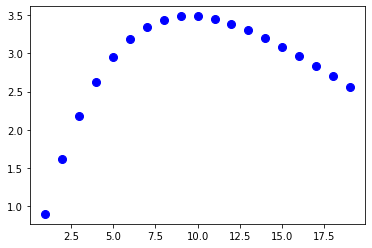

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

arr = np.arange(1,20)
ev = stats.binom.pmf(k = arr, n = arr, p = 0.9) * arr

ax.plot(arr, ev, 'bo', ms=8, label='Expected Value');

print(f"Trials that maximize winnings: {arr[np.argmax(ev)]}")

In [3]:
# 9 trials Expected Value
stats.binom.pmf(k = 9, n = 9, p = 0.9) * 9

3.486784401000001

In [4]:
# 10 trials Expected Value
stats.binom.pmf(k = 10, n = 10, p = 0.9) * 10

3.486784401000001

In [5]:
# Which is it? We can hard-code it for more precision
from math import factorial

def binom_pmf(k, n, p):
    z = factorial(n) / (factorial(k) * factorial(n-k))
    x = (p ** k) * (1 - p) ** (n-k)
    
    return z * x

a = binom_pmf(9,9,0.9) * 9.0
b = binom_pmf(10,10,0.9) * 10.0
print(a,b)
if a > b:
    print(f"9 games is best strategy")
if b > a:
    print(f"10 games is best strategy")

3.486784401000001 3.486784401000001


#### Solution With Replacement:

- It looks like 9 and 10 trials maximize winnings when `p = 0.9`, but given what I found in the extra credit my final answer will be that maximal strategy is to play 9 times (`n-1`).

#### Extra Credit:

Suppose your fairy godmother deals N cards each day (instead of 10 cards), with N−1 winning cards and one losing card. Now what is your strategy, and how many prizes do you expect to win each day?

- We can set `n` to be much larger, and account for that in the `p` we use `n-1`/`n` to represent success probability

In [6]:
# larger scale of N trials
N_list = [100, 1_000, 10_000, 250_000, 1_000_000, 
          2_000_000, 10_000_000, 100_000_000, 
          1_000_000_000] # up to 1 billion!

for N in N_list:
    arr = np.arange(N - 100, N + 1) # we only need to search at the tail

    # probability of success based on N
    p = (N - 1) / (N)

    # solving expected value
    ev = stats.binom.pmf(k = arr, n = arr, p = p) * arr
    print(f"Testing N of size {N}")
    print(f"Trials that maximize winnings: {arr[np.argmax(ev)]}")
    print(f"Highest Avg Winnings: {ev[np.argmax(ev)]}")
    print(f"Ratio relative to N: {N / ev[np.argmax(ev)]}\n")

Testing N of size 100
Trials that maximize winnings: 99
Highest Avg Winnings: 36.60323412732292
Ratio relative to N: 2.7319990264290284

Testing N of size 1000
Trials that maximize winnings: 999
Highest Avg Winnings: 367.6954247709637
Ratio relative to N: 2.719642216442853

Testing N of size 10000
Trials that maximize winnings: 9999
Highest Avg Winnings: 3678.6104643297044
Ratio relative to N: 2.71841775501015

Testing N of size 250000
Trials that maximize winnings: 249999
Highest Avg Winnings: 91969.67635274144
Ratio relative to N: 2.718287265045355

Testing N of size 1000000
Trials that maximize winnings: 999999
Highest Avg Winnings: 367879.2572210665
Ratio relative to N: 2.718283187679371

Testing N of size 2000000
Trials that maximize winnings: 1999999
Highest Avg Winnings: 735758.6984636541
Ratio relative to N: 2.71828250780619

Testing N of size 10000000
Trials that maximize winnings: 9999999
Highest Avg Winnings: 3678794.2297110497
Ratio relative to N: 2.7182819629423656

Testin

### Extra Credit Strategy: 

It looks like if we use replacement the strategy should be `N-1`, which makes me update my original answer to be `9` when there are 10 total cards with 9 winning.

Also interesting that the ratio of N to winning seems to converge towards `eulers number`. This means we can expect the following number of prizes with `N-1` winning cards in a set of `N` total cards:

$\frac{N}{e}$